## Data Modeling
* Read the data
* separate the features and labels
* Split traning and Testing Data
* Choose a Model
* Train it 
* Test Model
* Evaluate Models on Training Data
* Visualize the results
* Save Most Effective One

In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

### Read The Data

In [2]:
data = pd.read_json("data/preparedtweets.json")
data.head()

,text,target
0,Why am I a stupid fucking boy? God I'm laying ...,-1
1,#RealTweet........RT @Hustle_Simmonz: #MyFavor...,1
2,practiving faces for recital pictures tonight ...,1
3,BEYONCÉ JUST BLEW MY MIND. THAT WAS INCREDIBLE...,1
4,how am i supposed to distance myself from myse...,1


### Separate Features and Labels

In [7]:
# Features
X = data["text"]
# Labels
y = data["target"]
X, y

(0       Why am I a stupid fucking boy? God I'm laying ...
 1       #RealTweet........RT @Hustle_Simmonz: #MyFavor...
 2       practiving faces for recital pictures tonight ...
 3       BEYONCÉ JUST BLEW MY MIND. THAT WAS INCREDIBLE...
 4       how am i supposed to distance myself from myse...
                               ...                        
 3100    "Fortunately, you'll be happy to know--or mayb...
 3101    In itself, sadness or “grief is God’s gift to ...
 3102    If it ain't making me money, making me better ...
 3103    @DanaPerino Happy B-Day Jasper, Looking good f...
 3104    #make #money #problems or #Enjoy #Happy #MAKE ...
 Name: text, Length: 3105, dtype: object,
 0      -1
 1       1
 2       1
 3       1
 4       1
        ..
 3100    1
 3101   -1
 3102    1
 3103    1
 3104    1
 Name: target, Length: 3105, dtype: int64)

### Extract Text Feature to Train Model

In [8]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X)
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

X_counts.shape, X_tfidf.shape

((3105, 7198), (3105, 7198))

### Split Traning and Testing Data

In [9]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_tfidf, y, test_size = 0.20)
Xtrain.shape, len(ytrain)

((2484, 7198), 2484)

### Choose A Model - 1
* We choose Multinomial Naive Bayes Classifier

In [10]:
from sklearn.naive_bayes import MultinomialNB

### Train a Model

In [11]:
model1 = MultinomialNB()
model1.fit(Xtrain, ytrain);

### Make a Prediction

In [12]:
model1.predict_proba(count_vect.transform(["Sad Me #Sad #Depressed"]))

array([[9.22927617e-01, 7.68572240e-02, 2.15159491e-04]])

### Choose A Model - 2
* We Now Choose Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

### Train a Model

In [14]:
model2 = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
model2.fit(Xtrain, ytrain);

### Make a Prediction

In [15]:
model2.predict_proba(count_vect.transform(["I'm really Happy today"]))

array([[0.32395081, 0.3151738 , 0.36087539]])

### Choose A Model - 3
* We Now Chose Linear Support Vector Machine

In [16]:
from sklearn.svm import LinearSVC

### Train a Model

In [17]:
model3 =  LinearSVC()
model3.fit(Xtrain, ytrain);

### Make a prediction

In [18]:
model3.predict(count_vect.transform(["I'm Sad"]))

array([-1])

### Evaluate Each Score On Traning Data

In [19]:
model1.score(Xtrain, ytrain), model2.score(Xtrain, ytrain), model3.score(Xtrain, ytrain)

(0.9472624798711755, 0.6284219001610306, 0.9955716586151369)

### Visualize The Results

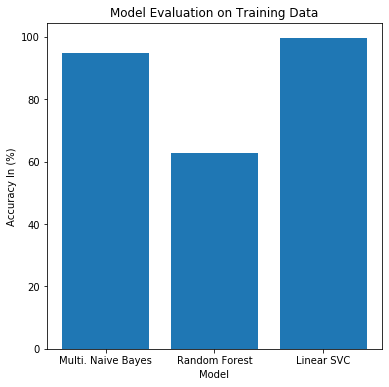

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6));
ax.set(title="Model Evaluation on Training Data",
        xlabel="Model",
        ylabel="Accuracy In (%)")
ax.bar(["Multi. Naive Bayes", "Random Forest", "Linear SVC"], [model1.score(Xtrain, ytrain) * 100, model2.score(Xtrain, ytrain) * 100, model3.score(Xtrain, ytrain) * 100]);

fig.savefig("data/images/training_result.png");

### Save Trained Effective Model and Test Data

In [17]:
import pickle

In [18]:
m3 = open("data/models/model3.mod", 'wb')
pickle.dump(model3, m3)
m3.close()


## Save Test Data

tX = open("data/tests/tx1", 'wb')
pickle.dump(Xtest, tX)
tX.close()


tY = open("data/tests/ty1", 'wb')
pickle.dump(ytest, tY)
tY.close()


## Save The Original Data

XData = open("data/tests/X", 'wb')
pickle.dump(X_tfidf, XData)
XData.close()


YData = open("data/tests/Y", 'wb')
pickle.dump(y, YData)
YData.close()


## Save Count Vector

CVData = open("data/tests/CVect", 'wb')
pickle.dump(count_vect, CVData)
CVData.close()
